# Proyek Akhir Word Graph

In [1]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 80.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pymupdf

doc = pymupdf.open("/content/drive/MyDrive/76_A+Stratified+Modeling-Machine+Learning+Approach+to+Improve+the+Accuracy+of+Non-Invasive+Blood+Glucose+Estimation+Using+Photoplethysmography+Signals.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [4]:
%%capture
!pip install nltk

In [5]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

	
76	
International Journal of Online and Biomedical Engineering (iJOE)	
iJOE | Vol. 21 No. 6 (2025)
iJOE  |  eISSN: 2626-8493  |  Vol. 21 No. 6 (2025)  | 
JOE
International Journal of 
Online and Bio


In [7]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['\t\n76\t\nInternational Journal of Online and Biomedical Engineering (iJOE)\t\niJOE | Vol.', '21 No.', '6 (2025)\niJOE\u2002 |\u2002 eISSN: 2626-8493\u2002 |\u2002 Vol.', '21 No.', '6 (2025)\u2002 |\u2002\nJOE\nInternational Journal of \nOnline and Biomedical Engineering\nFitrilina, Rusydi, M.I., Kurnia, R., Windasari, N., Putra, R.Z.', '(2025).', 'A Stratified Modeling-Machine Learning Approach to Improve the Accuracy \nof Non-Invasive Blood Glucose Estimation Using Photoplethysmography Signals.', 'International Journal of Online and Biomedical Engineering (iJOE), \n21(6), pp.', '76–96.', 'https://doi.org/10.3991/ijoe.v21i06.53815\nArticle submitted 2024-12-12.', 'Revision uploaded 2025-01-30.', 'Final acceptance 2025-01-30.', '© 2025 by the authors of this article.', 'Published under CC-BY.', 'Online-Journals.org\nPAPER\nA Stratified Modeling-Machine Learning Approach \nto Improve the Accuracy of Non-Invasive Blood Glucose \nEstimation Using Photoplethysmography Signals\nABSTRACT\n

In [8]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    \t\n76\t\nInternational Journal of Online and ...
1                                               21 No.
2         6 (2025)\niJOE  |  eISSN: 2626-8493  |  Vol.
3                                               21 No.
4    6 (2025)  | \nJOE\nInternational Journal of \n...
..                                                 ...
602  She continued specialist education in \nForens...
603  Currently, Dr. Winda is the Head of the Depart...
604  She is \nalso the Secretary of the Research Et...
605  Raffi Zahrandhika Putra graduated with a Bache...
606  He is currently working as a \nSpecialist Cons...

[607 rows x 1 columns]


In [9]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('kalimat.csv', encoding='utf-8')
text = " ".join(df['kalimat'].astype(str))

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
co_matrix_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,consistently,reddy,legal,failure,voltage,value,105338,18,mitigate,vice,...,opt101,continuous,applications,distinguish,characteristics,16,developed,stat,variable,including
consistently,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
reddy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
legal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
failure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
voltage,0,0,0,0,0,2,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
developed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
variable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
%%capture
pip install networkx

In [12]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)


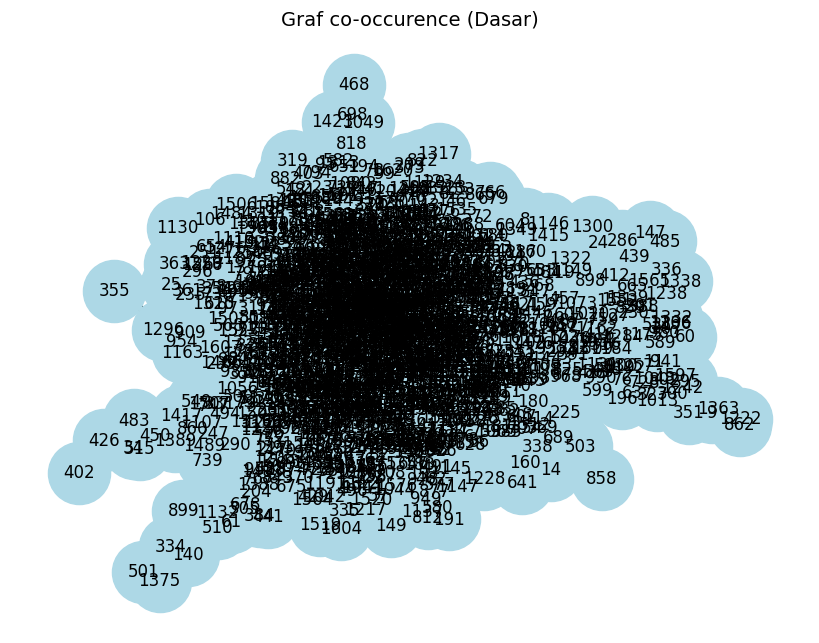

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()

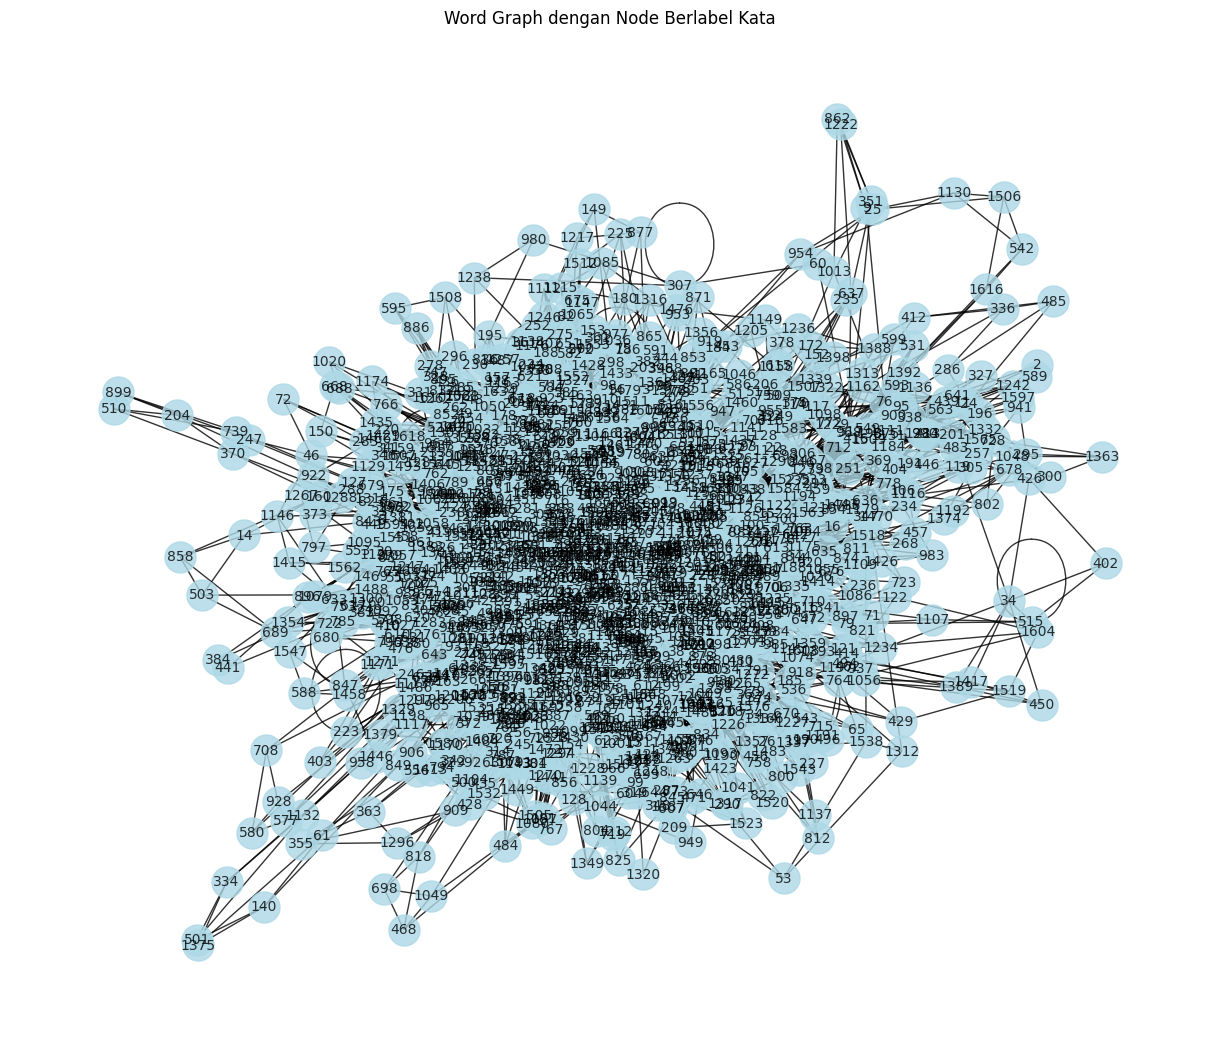

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
nx.draw(
    G,
    with_labels=True,
    node_size=500,
    node_color='lightblue',
    font_size=10,
    alpha=0.8
)
plt.title("Word Graph dengan Node Berlabel Kata")
plt.show()


In [15]:
mapping = {i: word for i, word in enumerate(unique_words)}
G = nx.relabel_nodes(G, mapping)


In [16]:
pr = nx.pagerank(G, alpha=0.85)
pr_df = pd.DataFrame(list(pr.items()), columns=['Kata', 'PageRank']).sort_values(by='PageRank', ascending=False)
print(pr_df.head(10))


            Kata  PageRank
1399     glucose  0.017931
1119       blood  0.013987
1318       https  0.010429
1559         100  0.009736
1453         vol  0.008923
306     diabetes  0.008172
534        using  0.008018
1533  regression  0.007687
522           pp  0.007032
1038        data  0.006949


In [17]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)

Self-loop edges: [('million', 'million'), ('r2', 'r2'), ('newcas', 'newcas'), ('table', 'table'), ('yang', 'yang'), ('energy', 'energy'), ('stratum', 'stratum'), ('25', '25'), ('diabetes', 'diabetes'), ('jakarta', 'jakarta'), ('chen', 'chen'), ('2014', '2014'), ('validation', 'validation'), ('2018', '2018'), ('vasconcelos', 'vasconcelos'), ('classification', 'classification'), ('2', '2'), ('2022', '2022'), ('medicine', 'medicine'), ('200', '200'), ('97', '97'), ('ahmad', 'ahmad'), ('99', '99'), ('engineering', 'engineering'), ('liu', 'liu'), ('n', 'n'), ('2017', '2017'), ('correlation', 'correlation'), ('sensor', 'sensor'), ('predictive', 'predictive'), ('mondal', 'mondal'), ('invasive', 'invasive'), ('region', 'region'), ('sensors', 'sensors'), ('data', 'data'), ('stratiﬁcation', 'stratiﬁcation'), ('blood', 'blood'), ('1', '1'), ('kim', 'kim'), ('2019', '2019'), ('testing', 'testing'), ('linear', 'linear'), ('ijoe', 'ijoe'), ('glucose', 'glucose'), ('training', 'training'), ('regressi

In [18]:
mapping = {i: word for i, word in enumerate(unique_words)}

G = nx.relabel_nodes(G, mapping)


In [19]:
self_loops = list(nx.selfloop_edges(G))
print("Self-loop edges:", self_loops)


Self-loop edges: [('million', 'million'), ('r2', 'r2'), ('newcas', 'newcas'), ('table', 'table'), ('yang', 'yang'), ('energy', 'energy'), ('stratum', 'stratum'), ('25', '25'), ('diabetes', 'diabetes'), ('jakarta', 'jakarta'), ('chen', 'chen'), ('2014', '2014'), ('validation', 'validation'), ('2018', '2018'), ('vasconcelos', 'vasconcelos'), ('classification', 'classification'), ('2', '2'), ('2022', '2022'), ('medicine', 'medicine'), ('200', '200'), ('97', '97'), ('ahmad', 'ahmad'), ('99', '99'), ('engineering', 'engineering'), ('liu', 'liu'), ('n', 'n'), ('2017', '2017'), ('correlation', 'correlation'), ('sensor', 'sensor'), ('predictive', 'predictive'), ('mondal', 'mondal'), ('invasive', 'invasive'), ('region', 'region'), ('sensors', 'sensors'), ('data', 'data'), ('stratiﬁcation', 'stratiﬁcation'), ('blood', 'blood'), ('1', '1'), ('kim', 'kim'), ('2019', '2019'), ('testing', 'testing'), ('linear', 'linear'), ('ijoe', 'ijoe'), ('glucose', 'glucose'), ('training', 'training'), ('regressi

In [20]:
import re
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt

In [21]:
raw_text_combined = " ".join(df['kalimat'].astype(str))

def advanced_cleaning(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_text = advanced_cleaning(raw_text_combined)
tokens = word_tokenize(clean_text)

In [22]:
filtered_tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

print("Contoh 20 token hasil cleaning baru:", filtered_tokens[:20])

Contoh 20 token hasil cleaning baru: ['international', 'journal', 'online', 'biomedical', 'engineering', 'ijoe', 'ijoe', 'vol', 'ijoe', 'eissn', 'vol', 'joe', 'international', 'journal', 'online', 'biomedical', 'engineering', 'fitrilina', 'rusydi', 'kurnia']


In [23]:
bigram_list = list(ngrams(filtered_tokens, 2))

G_new = nx.DiGraph()

bigram_counts = Counter(bigram_list)

for (u, v), count in bigram_counts.items():
    G_new.add_edge(u, v, weight=count)

print(f"\nGraph Baru Terbentuk!")
print(f"Jumlah Nodes (Kata Unik): {G_new.number_of_nodes()}")
print(f"Jumlah Edges (Bigram Unik): {G_new.number_of_edges()}")


Graph Baru Terbentuk!
Jumlah Nodes (Kata Unik): 1631
Jumlah Edges (Bigram Unik): 3671


In [24]:
print("\n--- Menghitung Centrality Measures ---")

degree_cent = nx.degree_centrality(G_new)
between_cent = nx.betweenness_centrality(G_new)
closeness_cent = nx.closeness_centrality(G_new)

top_degree_sample = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Degree Centrality:", top_degree_sample)
top_betweenness_sample = sorted(between_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Betweenness Centrality:", top_degree_sample)
top_closeness_sample = sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Closeness Centrality:", top_degree_sample)


--- Menghitung Centrality Measures ---
Top 5 Degree Centrality: [('diabetes', 0.046625766871165646), ('data', 0.04110429447852761), ('using', 0.03987730061349694), ('glucose', 0.03865030674846626), ('noninvasive', 0.03742331288343558)]
Top 5 Betweenness Centrality: [('diabetes', 0.046625766871165646), ('data', 0.04110429447852761), ('using', 0.03987730061349694), ('glucose', 0.03865030674846626), ('noninvasive', 0.03742331288343558)]
Top 5 Closeness Centrality: [('diabetes', 0.046625766871165646), ('data', 0.04110429447852761), ('using', 0.03987730061349694), ('glucose', 0.03865030674846626), ('noninvasive', 0.03742331288343558)]


In [25]:
pagerank_scores = nx.pagerank(G_new, alpha=0.85)

top_20_ranked = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:20]

print("\n--- TOP 20 KATA PALING PENTING (PageRank) ---")
top_20_words = []
for rank, (node, score) in enumerate(top_20_ranked, 1):
    top_20_words.append(node)
    print(f"{rank}. {node} (Score: {score:.5f}) | Betweenness: {between_cent[node]:.5f}")


--- TOP 20 KATA PALING PENTING (PageRank) ---
1. glucose (Score: 0.01972) | Betweenness: 0.09278
2. blood (Score: 0.01650) | Betweenness: 0.04948
3. noninvasive (Score: 0.01210) | Betweenness: 0.10543
4. vol (Score: 0.01041) | Betweenness: 0.12415
5. diabetes (Score: 0.00927) | Betweenness: 0.14968
6. using (Score: 0.00861) | Betweenness: 0.08882
7. regression (Score: 0.00797) | Betweenness: 0.06548
8. ppg (Score: 0.00743) | Betweenness: 0.06180
9. data (Score: 0.00720) | Betweenness: 0.10944
10. estimation (Score: 0.00636) | Betweenness: 0.04933
11. accuracy (Score: 0.00577) | Betweenness: 0.04544
12. linear (Score: 0.00565) | Betweenness: 0.03473
13. region (Score: 0.00552) | Betweenness: 0.02759
14. model (Score: 0.00543) | Betweenness: 0.03809
15. stratified (Score: 0.00536) | Betweenness: 0.03628
16. ijoe (Score: 0.00531) | Betweenness: 0.02077
17. diabetic (Score: 0.00511) | Betweenness: 0.03405
18. international (Score: 0.00499) | Betweenness: 0.04064
19. engineering (Score: 0.

Sedang men-generate Graph Keseluruhan... (Mungkin memakan waktu jika data banyak)


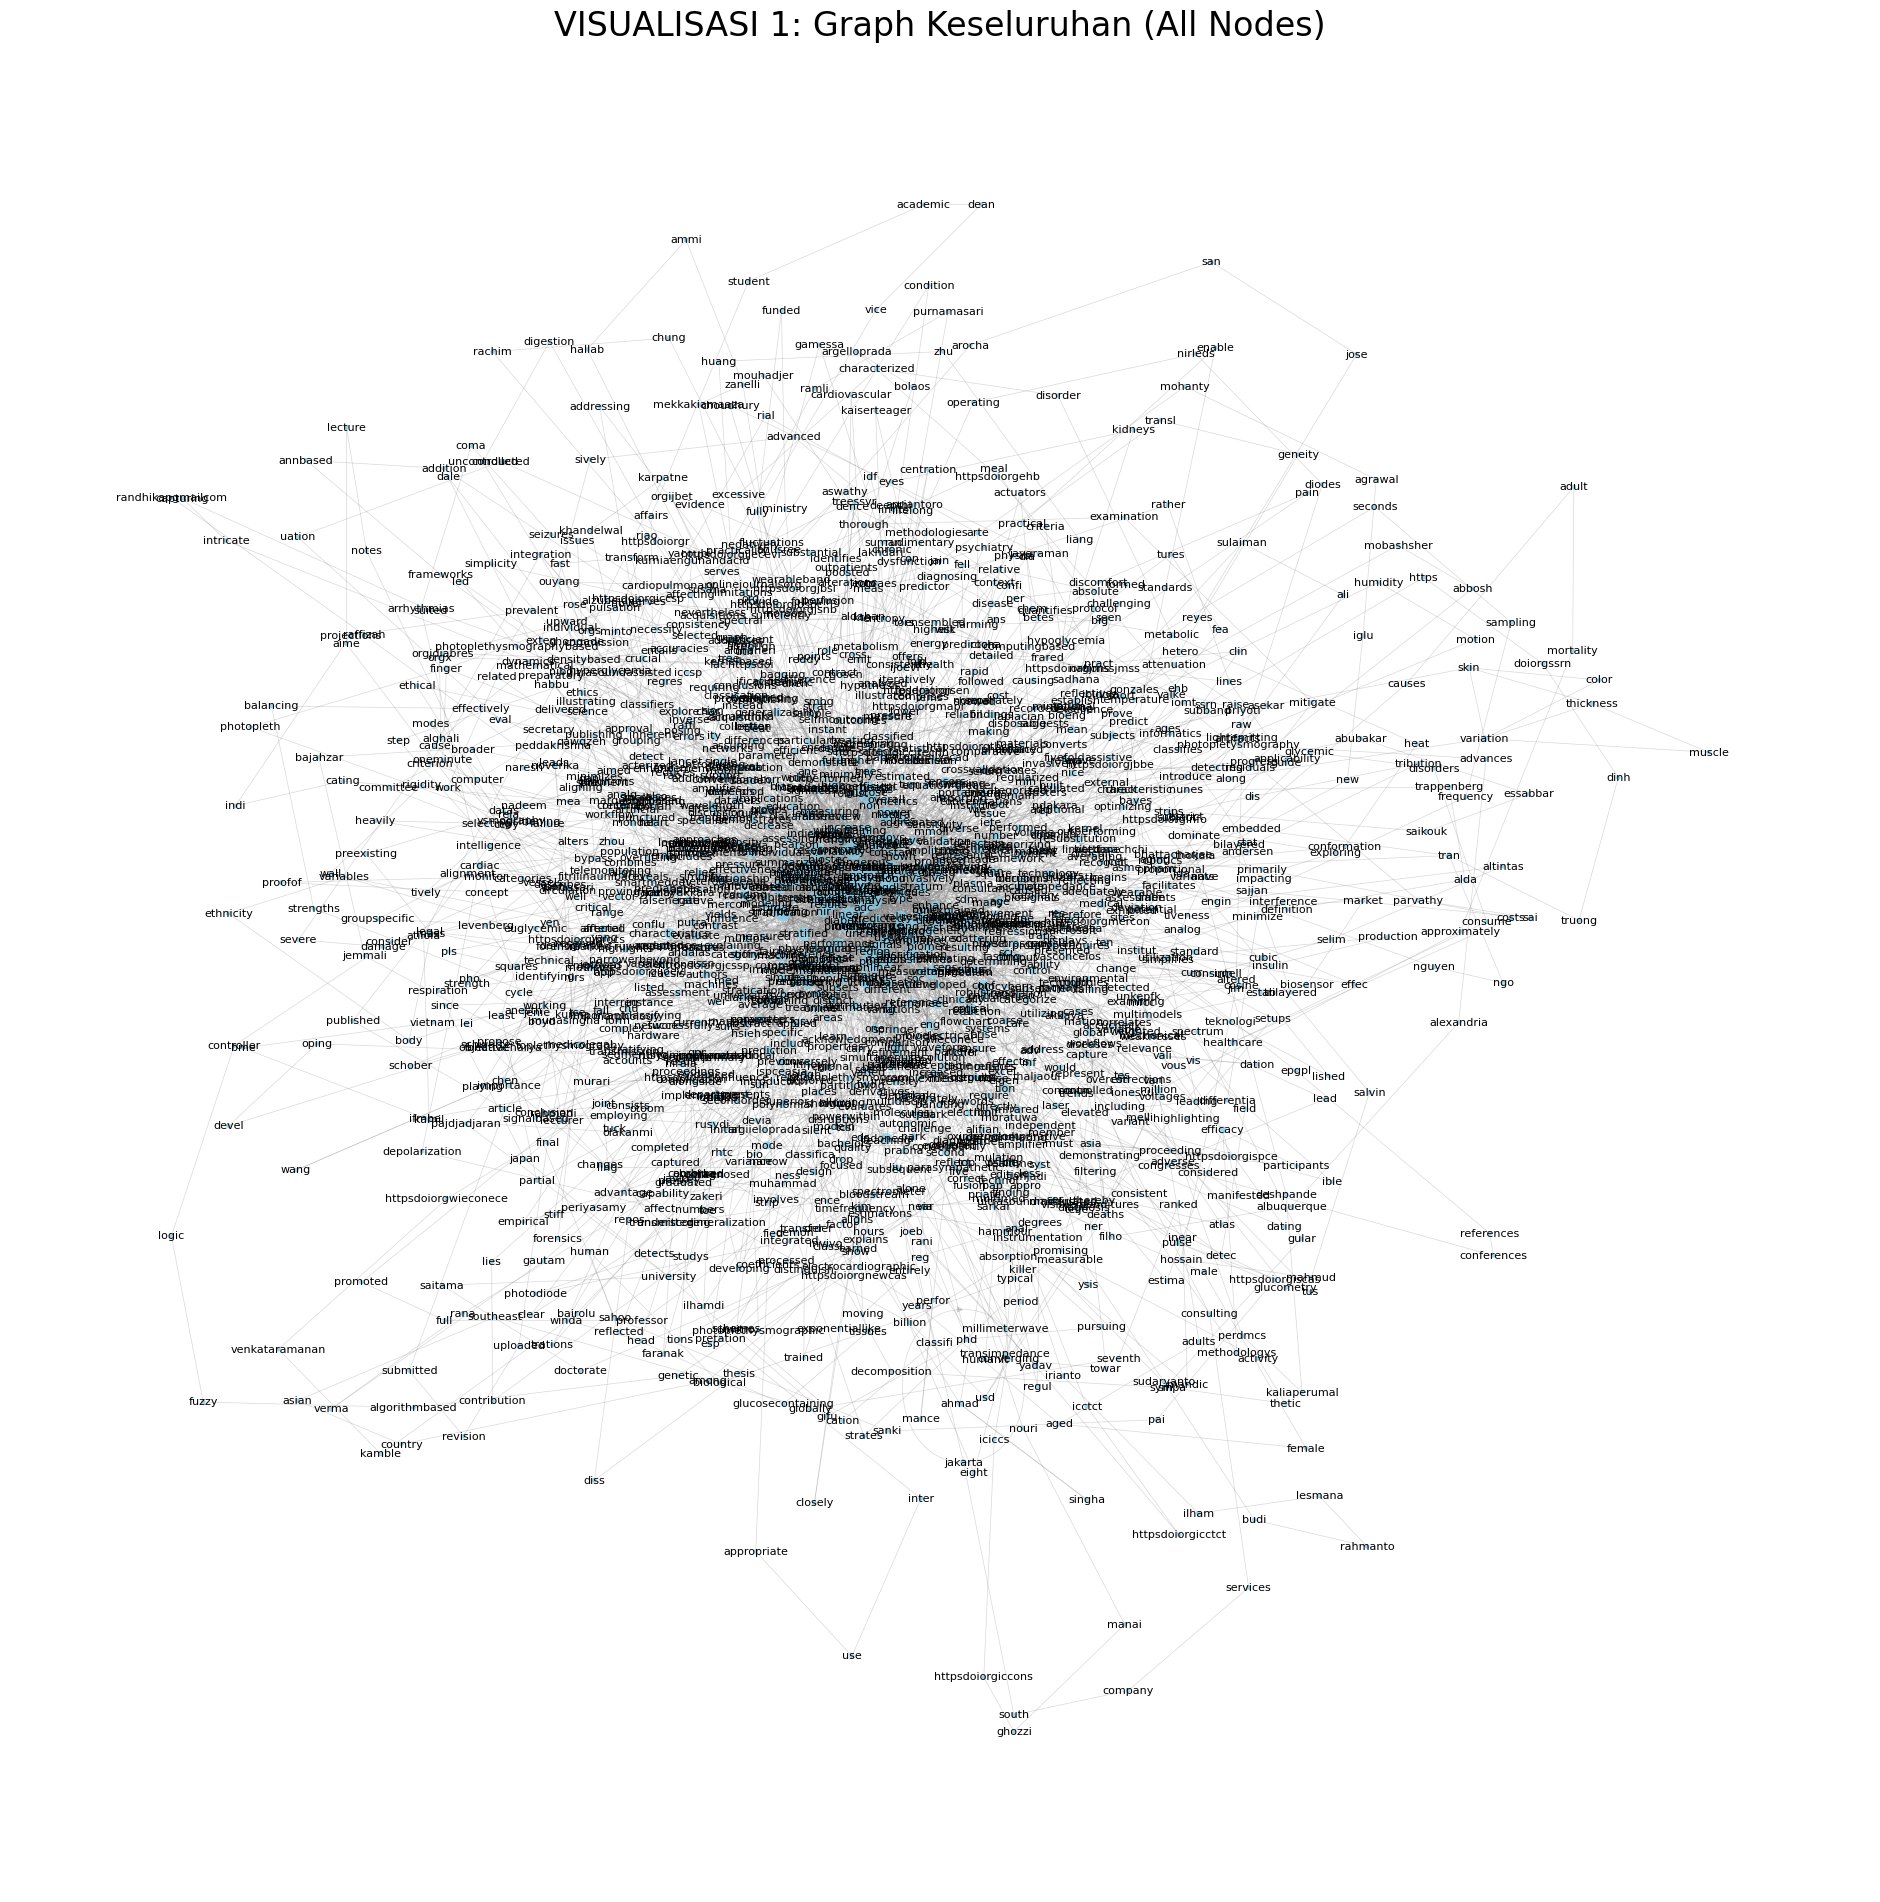

In [26]:
print("Sedang men-generate Graph Keseluruhan... (Mungkin memakan waktu jika data banyak)")

plt.figure(figsize=(24, 24))

pos_all = nx.spring_layout(G_new, k=0.15, seed=42, iterations=20)

node_sizes = [v * 5000 for v in degree_cent.values()]

nx.draw_networkx_nodes(G_new, pos_all, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G_new, pos_all, width=0.5, alpha=0.3, edge_color='gray', arrows=False)

nx.draw_networkx_labels(G_new, pos_all, font_size=8, font_color='black')

plt.title("VISUALISASI 1: Graph Keseluruhan (All Nodes)", fontsize=24)
plt.axis('off')
plt.show()
